## Daftar Isi
- [Overview machine learning](#overview-machine-learning)
- [Paradigma Machine Learning](#paradigma-machine-learning)
- [Pemodelan supervised learning](#teknik-teknik-pemodelan-machine-learning)
- [Gradient descent](#gradient-descent)
- [Bias & variance tradeoff](#bias-variance-tradeoff)


# Overview to AI - Machine Learning

Artificial Intelligence / AI, adalah istilah umum yang membahas kemampuan komputer untuk mensimulasikan kemampuan kognitif seperti manusia.   
Coba sebutkan aplikatif AI yang kalian temui!

Artificial Intelligence teridiri dari beberapa kategori aplikatif:  
![kategori-AI](./assets/kategori-AI.png)

Dari gambar dibawah ini, ada yang bisa menebak / menambahkan apa perbedaan AI, machine learning, dan deep learning?  

![Hierarchy of AI](./assets/hierarchi.png)


Lalu gimana proses machine learning ini?

![proses-ML](./assets/proses.png)

![paradigma](./assets/paradigma.png)

Sebelum berlanjut, ada beberapa istilah yang perlu dipahami lebih dulu:  
a. Data berdasarkan representasi bentuk datanya diberdakan jadi 3 (Tabular, Gambar, Tidak terstruktur)  
b. Arsitektur merujuk pada desain atau struktur dari algoritma pembelajarannya, *khususnya di deep learning  
c. Model adalah implementasi arsitektur yang sudah dilatih dengan data sehingga punya bobot (weigth) dan bias yang spesifik.  
d. Bobot merupakan parameter yang mempengaruhi suatu input terhadap suatu output  
e. Bias, parameter tambahan untuk fleksibilitas dalam mempelajari pola data.  

# Pemodelan Supervised Learning 

## Algoritma - Classification

### A. K-Nearest Neighbor (KNN)
Prinsip kerja KNN adalah mencari k-tetangga terdekat dari suatu data baru berdasarkan perhitungan jarak menggunakan metrik tertentu.

Setelah menemukan beberapa tetangga terdekat, dilakukan voting untuk menentukan kelas dengan jumlah kemunculan terbanyak di antara kelas-kelas tersebut.

Untuk dua titik $X = (x_1, x_2, \dots, x_n)$ dan $Y = (y_1, y_2, \dots, y_n)$, jarak $d(X, Y)$ dapat didefinisikan sebagai berikut:

**Euclidean Distance**

$$d(X, Y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

Jarak Euclidean mengukur panjang garis lurus antara dua titik dalam ruang.

**Manhattan Distance**

$$d(X, Y) = \sum_{i=1}^n |x_i - y_i|$$

Jarak Manhattan menghitung jumlah perbedaan absolut antar koordinat, seperti jarak tempuh di grid kota.

**Minkowski Distance**

$$d(X, Y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}$$

Jarak Minkowski adalah generalisasi dari Euclidean dan Manhattan, di mana:  
$p = 1$, jarak Manhattan.  
$p = 2$, jarak Euclidean.  


<img src="./assets/knn1.png" alt="knn" width="fit-content" height="fit-content">

Untuk k = 3, voting class terbanyak dimenangkan class B  
Untuk k = 6, voting class terbanyak dimenangkan class A


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Data latih
X = np.array([[5.0, 3.5], [4.8, 3.0], [6.5, 4.0], [7.0, 4.5]])  # Fitur: [panjang, lebar]
y = np.array([0, 0, 1, 1])  # Kelas: 0 (Tipe A), 1 (Tipe B)

# Data baru 
data_baru = np.array([[6.0, 3.8]])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

hasil_prediksi = knn.predict(data_baru)

print(f"Tanaman dengan panjang daun {data_baru[0][0]} cm dan Lebar Daun {data_baru[0][1]} cm diprediksi: {hasil_prediksi[0]}")

Tanaman dengan panjang daun 6.0 cm dan Lebar Daun 3.8 cm diprediksi: 1


Keunggulan KNN  adalah algoritma yang mudah dipahami dan tidak memerlukan proses pemodelan yang rumit. Namun, kelebihan ini juga membawa beberapa kelemahan yang perlu diperhatikan. Salah satunya, KNN dapat bekerja lambat ketika jumlah data mencapai ribuan, karena algoritma ini harus menghitung jarak ke setiap data satu per satu (time complexity `O(ND)`, `N` banyak data dan `D` dimensi)

Selain itu, KNN membutuhkan data yang seimbang agar tidak bias. Jika data tipe A jauh lebih banyak daripada tipe B, KNN cenderung memprediksi semua data sebagai tipe A.

### B. Gaussian Naive Bayes (NB)
Algoritma klasifikasi berbasis probabilitas yang menggunakan Teorema Bayes, yang menggambarkan probabilitas suatu kejadian, berdasarkan pengetahuan sebelumnya mengenai kondisi yang mungkin terkait 

Diaumsikan peluang ini mengikuti Gaussian (terdistribusi normal)

Algoritma ini "naive" (polos) karena mengasumsikan bahwa semua fitur dalam data saling independen satu sama lain—meskipun dalam kenyataannya asumsi ini sering tidak benar, tapi memudahkan perhitungan peluangnya

<img src="./assets/gaussianNB.png" alt="knn" width="fit-content" height="fit-content">

diasumsikan berdistribusi normal, maka peluang P(x_i|C) dapat dihitung dengan
$$
P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma^2_C}} \exp\left(-\frac{(x_i - \mu_C)^2}{2\sigma^2_C}\right)
$$

**Teorema Bayes**

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

- $P(C|X)$ adalah probabilitas kelas $C$ diberikan fitur $X$ (posterior probability),
- $P(X|C)$ adalah probabilitas fitur $X$ terjadi jika diketahui kelas $C$ (likelihood),
- $P(C)$ adalah probabilitas awal kelas $C$ (prior),
- $P(X)$ adalah probabilitas fitur $X$ secara umum (evidence).




Lalu, Naive Bayes memilih kelas dengan nilai posterior paling tinggi:

$$
\text{Nilai Posterior} = \text{Prior} \times \text{Likelihood}
$$

Untuk setiap kelas $C$, kita hitung:

$$
P(C|X) \propto P(C) \times P(x_1|C) \times P(x_2|C) \times \dots \times P(x_n|C)
$$

- **Prior**: seberapa sering kelas itu muncul dalam data.
- **Likelihood**: seberapa besar kemungkinan fitur-fitur tersebut muncul dalam kelas itu.

Asumsi independensi antar fitur membuat perhitungan menjadi jauh lebih sederhana, sehingga algoritma ini sangat cepat dan efisien untuk data besar.





In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Data latih
X = np.array([[5.0, 3.5], [4.8, 3.0], [6.5, 4.0], [7.0, 4.5]])  # Fitur
y = np.array([0, 0, 1, 1])  # Kelas: 0 (Tipe A), 1 (Tipe B)

# Data baru
data_baru = np.array([[6.0, 3.8]])

nb = GaussianNB()
nb.fit(X, y)

hasil_prediksi = nb.predict(data_baru)

print(f"Tanaman dengan panjang daun {data_baru[0][0]} cm dan lebar daun {data_baru[0][1]} cm diprediksi: {hasil_prediksi[0]}")

Tanaman dengan panjang daun 6.0 cm dan lebar daun 3.8 cm diprediksi: 1


**Keunggulan Naive Bayes**:
- Cepat dan efisien, cocok untuk dataset besar.
- Performa sangat baik meskipun asumsi independensi tidak selalu terpenuhi.
- Bekerja dengan baik pada data teks (spam detection, sentiment analysis).

**Kelemahan**:
- Asumsi fitur independen seringkali tidak realistis.
- Tidak menangani fitur numerik dengan baik jika tidak diasumsikan distribusi tertentu (seperti Gaussian).

### C. Decision Tree

**Decision Tree** (Pohon Keputusan) adalah algoritma klasifikasi yang memetakan serangkaian aturan keputusan dari fitur ke label kelas. Algoritma ini membagi data ke dalam cabang-cabang berdasarkan fitur tertentu, sehingga setiap jalur dari akar ke daun merupakan keputusan berdasarkan fitur.

Proses pembentukan pohon ini menggunakan konsep *pembagian data* (splitting) berdasarkan *impurity* (ketidakhomogenan) — semakin homogen (satu kelas dominan), semakin baik.

#### **Konsep Pemilihan Fitur**

Setiap node memutuskan fitur mana yang akan digunakan untuk membagi data berdasarkan kriteria tertentu, di antaranya:

- **Entropy & Information Gain**
**Entropy** mengukur ketidakpastian dalam suatu himpunan data:

$$
H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i
$$

di mana $p_i$ adalah proporsi data dari kelas ke-$i$.

**Information Gain (IG)** mengukur seberapa banyak ketidakpastian berkurang setelah pembagian berdasarkan fitur:

$$
IG(S, A) = H(S) - \sum_{v \in \text{nilai}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

- **Gini Index**

Alternatif dari entropy, digunakan dalam algoritma seperti CART (Classification and Regression Tree):

$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$


<img src="./assets/decisionTree.png" alt="decision_tree" width="fit-content" height="fit-content">

Dengan 2 class, Iya / Tidak bermain bola, nilai fitur-fitur akan menentukan nilai akhir keputusan

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Buat DataFrame
data = pd.DataFrame({
    'Cuaca': ['Cerah', 'Cerah', 'Mendung', 'Hujan', 'Hujan'],
    'Kelembapan': ['Tinggi', 'Normal', None, None, None],
    'Intensitas': [None, None, None, 'Tinggi', 'Normal'],
    'Bermain': ['Tidak', 'Iya', 'Iya', 'Tidak', 'Iya']
})

# Encode data kategorikal
from sklearn.preprocessing import LabelEncoder

le_cuaca = LabelEncoder()
le_kelembapan = LabelEncoder()
le_intensitas = LabelEncoder()
le_label = LabelEncoder()

data['Cuaca_enc'] = le_cuaca.fit_transform(data['Cuaca'])
data['Kelembapan_enc'] = le_kelembapan.fit_transform(data['Kelembapan'].astype(str))
data['Intensitas_enc'] = le_intensitas.fit_transform(data['Intensitas'].astype(str))
data['Label_enc'] = le_label.fit_transform(data['Bermain'])

X = data[['Cuaca_enc', 'Kelembapan_enc', 'Intensitas_enc']]
y = data['Label_enc']

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

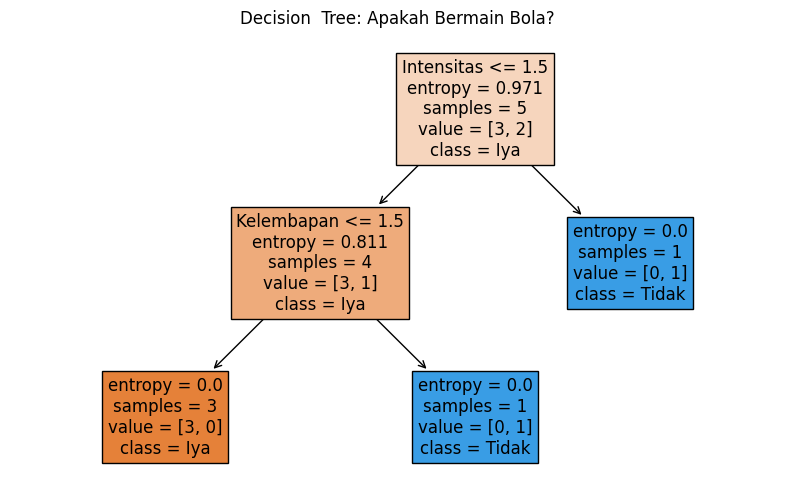

In [ ]:
# Visualisasi
plt.figure(figsize=(10,6))
plot_tree(tree, feature_names=['Cuaca', 'Kelembapan', 'Intensitas'],
          class_names=le_label.classes_, filled=True, fontsize=12)
plt.title("Decision  Tree: Apakah Bermain Bola?")
plt.show()

### D. Random Forest (RF)
Salah satu pendekatan untuk mengatasi kelemahan decision tree adalah dengan menggabungkan banyak model pohon keputusan melalui teknik ensemble, khususnya bagging (bootstrap aggregating) yang menggabungkan banyak pohon keputusan **(Decision Tree)**. Alih-alih mengandalkan satu pohon, Random Forest membangun **sekumpulan pohon** dan menggunakan **voting mayoritas** untuk prediksi klasifikasi.

Ilustrasi Random Forest  

<img src="./assets/RF.png" alt="decision_tree" width="fit-content" height="fit-content">

Random Forest melakukan hal ini melalui langkah-langkah sebagai berikut:

1. **Bootstrap Sampling**: Dari dataset asli, dibuat beberapa subset data secara acak dengan pengembalian. Ini artinya, beberapa sampel bisa muncul lebih dari sekali dalam satu subset.

2. **Pembuatan Tree**: Setiap subset digunakan untuk melatih satu pohon keputusan.

3. **Random Subset of Features**: Saat menentukan pemisahan pada setiap node dalam tree, hanya sebagian kecil dari fitur yang dipilih secara acak untuk dipertimbangkan.

4. **Voting**: Prediksi akhir didapat dengan voting mayoritas dari semua pohon (untuk klasifikasi) atau rata-rata (untuk regresi).

Setiap pohon dalam Random Forest hanya dilatih pada sebagian data. Sisa data yang **tidak** digunakan untuk melatih pohon tersebut disebut sebagai **Out-of-Bag (OOB)**. Data ini dapat digunakan untuk mengestimasi akurasi model tanpa memerlukan dataset validasi tambahan.

Secara matematis, untuk $T$ pohon dan $N$ sampel data, OOB error dihitung sebagai:

$$
OOB \space Error = \frac{1}{N} \sum_{i=1}^N I(y_{i, OOB} \ne y_i)
$$

Dimana:
- $y_{i, OOB}$ adalah hasil voting mayoritas dari prediksi-prediksi pohon yang **tidak menggunakan** data ke-$i$ saat pelatihan,
- $y_i$ adalah label asli data ke-$i$,
- $I(condition)$ adalah fungsi indikator: bernilai 1 jika kondisinya benar, 0 jika salah.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data latih
X = np.array([[5.0, 3.5], [4.8, 3.0], [6.5, 4.0], [7.0, 4.5]])
y = np.array([0, 0, 1, 1])  # Kelas: 0 (Tipe A), 1 (Tipe B)

# Data baru
data_baru = np.array([[6.0, 3.8]])

# Random Forest
forest = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=42)
forest.fit(X, y)

hasil_prediksi = forest.predict(data_baru)

print(f"Prediksi: {hasil_prediksi[0]}")
print(f"OOB Score: {forest.oob_score_}")

Prediksi: 1
OOB Score: 1.0


**Keunggulan:**
- Mengurangi overfitting dengan voting agregasi.
- Memiliki performa yang baik bahkan dengan parameter default.
- Tidak membutuhkan normalisasi data.
- Dapat mengukur pentingnya fitur (feature importance).

**Kelemahan:**
- Kurang interpretatif dibandingkan satu pohon keputusan.
- Lebih lambat saat pelatihan dan prediksi karena banyaknya pohon.
- Konsumsi memori bisa tinggi untuk dataset besar.

E. Super Vector Machine (SVM)

### E. Support Vector Machine (SVM)

SVM bekerja dengan mencari **garis pemisah terbaik** (*optimal separating hyperplane*) yang memisahkan kelas-kelas dengan **margin maksimum**.

Konsep dasar SVM dijelaskan secara ringkas namun kuat dalam buku *"An Introduction to Statistical Learning"* oleh James, Witten, Hastie, dan Tibshirani:

> *“The maximal margin classifier finds the hyperplane that maximizes the distance, or margin, between it and the training observations. This is based on the intuition that a larger margin on the training data will lead to better generalization to the test data.”*

Dalam klasifikasi dua kelas, SVM akan berusaha mencari hyperplane yang **tidak hanya memisahkan** dua kelas, tapi juga **berjarak sejauh mungkin dari data terdekat dari masing-masing kelas**. Data-data yang terletak paling dekat dengan hyperplane inilah yang disebut sebagai **support vectors**.

<img src="./assets/linearSVM.png" alt="svm kernels" width="fit-content" height="fit-content">


Untuk dua kelas yang dapat dipisahkan secara linear, SVM mencari hyperplane:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

Yang memaksimalkan margin:

$$
\text{Margin} = \frac{2}{\|\mathbf{w}\|}
$$

Dengan syarat semua data memenuhi:

$$
y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
$$

Namun, tidak semua data selalu bisa dipisahkan secara linear. Oleh karena itu, SVM menggunakan **fungsi kernel** untuk mengubah data ke dimensi yang lebih tinggi agar bisa dipisahkan secara linear di sana, atau sering dikenal dengan The Kernel Trick

- **Linear kernel**: Untuk data yang dapat dipisahkan secara linear.  

<img src="./assets/linearkernel.png" alt="svm kernels" width="300" height="300">

- **Polynomial kernel**: Cocok untuk pola data non-linear dengan interaksi antara fitur.  

<img src="./assets/polynomicalkernel.png" alt="svm kernels" width="300" height="300">

- **RBF (Radial Basis Function) kernel / Gaussian**: Cocok untuk data kompleks dan tidak linear.  

<img src="./assets/rbfkernel.png" alt="svm kernels" width="600" height="300">

Gambar didapat dari source youtube "visually-learn"



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_svm_decision_boundary(model, X, y, kernel_name):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 4))
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['#FFAAAA', '#AAAAFF'], linestyles=['--', '-', '--'])
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles=['-'])  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label="Data")
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=150, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.legend()
    plt.title(f"SVM dengan Kernel {kernel_name}")
    plt.xlabel("Fitur 1")
    plt.ylabel("Fitur 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


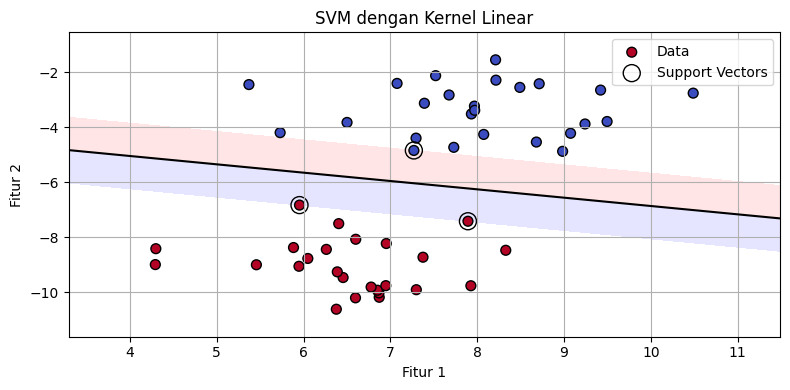

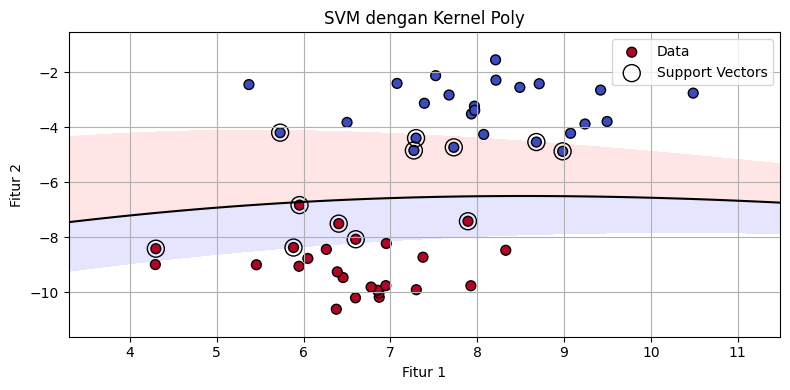

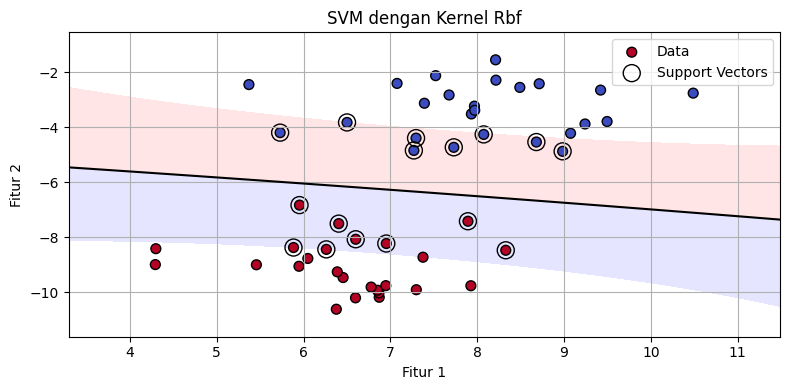

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=1.0)


kernels = ['linear', 'poly', 'rbf']


for kernel in kernels:

    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0)  
    else:
        model = SVC(kernel=kernel, C=1.0)
    model.fit(X, y)
    

    plot_svm_decision_boundary(model, X, y, kernel.capitalize())

**Keunggulan:**
- Sangat efektif untuk data berdimensi tinggi.
- Cocok digunakan untuk data dengan margin yang jelas antar kelas.
- Dapat digunakan untuk klasifikasi non-linear dengan bantuan kernel.
- Tahan terhadap overfitting, terutama saat jumlah fitur lebih banyak dari jumlah sampel.

**Kelemahan:**
- Kurang efisien untuk dataset sangat besar (kompleksitas komputasi tinggi).
- Memerlukan pemilihan kernel dan parameter yang tepat (misalnya, `C` dan `gamma`).
- Tidak memberikan interpretasi langsung seperti decision tree.

## Algoritma - Regression

### A. Linear Regression

Linear Regression digunakan untuk memodelkan hubungan antara satu atau lebih fitur input (variabel independen) dan target numerik (variabel dependen) dengan asumsi bahwa hubungan tersebut bersifat linier.

Mengutip dari buku *"An Introduction to Statistical Learning"* (James et al., 2013):

> *“Linear regression is perhaps the most widely used statistical learning method. It has been used for decades in all fields of science.”*

Model ini mencari garis lurus terbaik yang meminimalkan selisih kuadrat antara nilai prediksi dan nilai aktual.

Untuk kasus **regresi linier sederhana** (dengan satu fitur) diberikan persamaan sebagai berikut:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Untuk **regresi linier berganda** (lebih dari satu fitur):

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

Di mana:
- $\hat{y}$ = nilai prediksi
- $x_i$ = fitur ke-$i$
- $\beta_0$ = intercept
- $\beta_i$ = koefisien regresi (slope)



Tujuan dari model regresi adalah mencari nilai $\beta_0, \beta_1, \dots, \beta_p$ yang **meminimalkan galat kuadrat rata-rata (MSE)**:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



<img src="./assets/linear-regression.png" alt="linear regression" width="fit-content" height="fit-content">

Garis regresi berusaha meminimalkan selisih antara titik data dan garis lurus yang dihasilkan model.



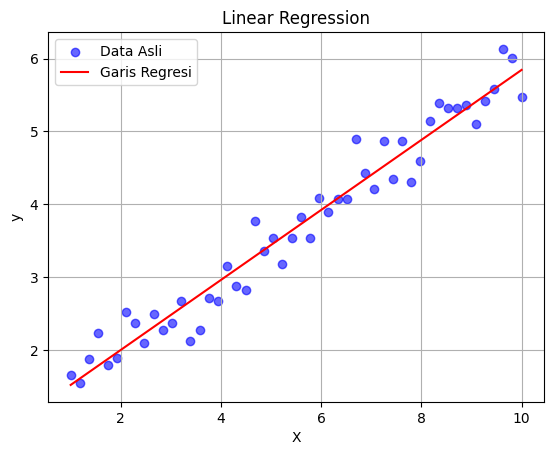

Intercept: 1.0386607274915
Slope: 0.4806722001693924


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)  
X = np.linspace(1, 10, 50).reshape(-1, 1)  
y = 0.5 * X.flatten() + 1 + np.random.normal(0, 0.3, 50)  # y = 0.5x + 1 + noise

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Data Asli', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Garis Regresi')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Koefisien
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Ini berarti kalau X = 0, maka nilai y yang diprediksi oleh model adalah sekitar 1.04. Dengan kata lain, garis regresi memotong sumbu y di titik 1.04. Setiap kali X bertambah 1, nilai y akan bertambah sebesar 0.48 (hampir setengah). Jadi, hubungan antara X dan y adalah positif: kalau X naik, y juga naik.

#### Kelebihan 
- Sangat sederhana dan mudah diinterpretasikan
- Cepat dihitung, efisien untuk dataset kecil hingga sedang
- Cocok untuk melihat pengaruh fitur terhadap target

#### Kelemahan 
- Tidak bekerja dengan baik jika hubungan tidak linier
- Sensitif terhadap *outlier*
- Rentan terhadap multikolinearitas jika banyak fitur berkorelasi tinggi

### B. Regression Tree
Jika pada Decision Tree Classifier kita memprediksi kelas, maka pada Regression Tree kita memprediksi nilai numerik kontinu. Model ini mempartisi ruang fitur menjadi beberapa region, dan memberikan nilai prediksi berupa rata-rata dari target dalam region tersebut.

Mengutip dari buku The Elements of Statistical Learning:

>"Regression trees predict a continuous response variable by partitioning the feature space into distinct and non-overlapping regions, then fitting a constant in each region."

Secara intuitive, regression tree bekerja dengan beberapa tahap:
1. Membagi data berdasarkan fitur yang menghasilkan **pengurangan galat paling besar**, biasanya galat dinyatakan dalam bentuk **sum of squared errors (SSE)** atau **mean squared error (MSE)**.

2. Setiap split menghasilkan dua bagian, dan proses ini berulang (rekursif) hingga kondisi berhenti tertentu terpenuhi (seperti kedalaman maksimal atau jumlah minimum sampel per daun).

3. Prediksi untuk tiap region adalah rata-rata target di dalamnya.


Misalnya kita ingin membagi data pada fitur $X_j$ pada nilai split $s$ menjadi dua region:
- $R_1(j, s) = \{X | X_j \le s\}$
- $R_2(j, s) = \{X | X_j > s\}$

Tujuan kita adalah mencari split yang meminimalkan:

$$
\sum_{i: x_i \in R_1(j, s)} (y_i - \bar{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)} (y_i - \bar{y}_{R_2})^2
$$

Perhatikan ilustrasi ini  

<img src="./assets/regression-tree.png" alt="linear regression" width="fit-content" height="fit-content">

Ilustrasi diatas merupakan pohon regresi yang memprediksi nilai harga rumah berdasarkan fitur-fitur seperti TAX, AGE, ROOM, NOX, dst dengan cara membagi data menjadi 2 region / kelompok - kelompok kecil.

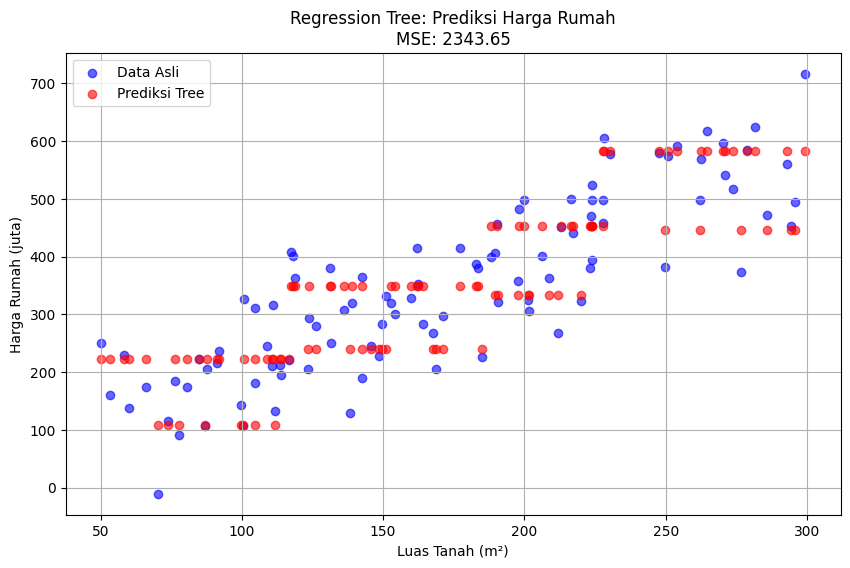

Contoh Data dan Prediksi (5 baris pertama):
   Umur Rumah  Luas Tanah  Banyak Kamar  Tinggi Rumah  Harga Asli (juta)  \
0          39  148.720380             4      5.218454         228.551574   
1          29  123.372044             3      4.186449         205.435478   
2          15   53.519956             2      6.897609         160.430881   
3          43   99.710601             3      9.553083         143.734881   
4           8  227.835488             3      7.872209         497.471753   

   Harga Prediksi (juta)  
0             240.699368  
1             240.699368  
2             222.573806  
3             108.228509  
4             583.286202  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


np.random.seed(42)  
n_samples = 100  

# Fitur-fitur rumah
umur_rumah = np.random.randint(1, 50, n_samples)  
luas_tanah = np.random.uniform(50, 300, n_samples) 
banyak_kamar = np.random.randint(1, 6, n_samples)  
tinggi_rumah = np.random.uniform(3, 10, n_samples)  

# Harga = 2 * luas_tanah + 20 * banyak_kamar - 5 * umur_rumah + 10 * tinggi_rumah + noise
harga_rumah = (2 * luas_tanah + 20 * banyak_kamar - 5 * umur_rumah + 10 * tinggi_rumah + 
               np.random.normal(0, 30, n_samples))


data = pd.DataFrame({
    'Umur Rumah (tahun)': umur_rumah,
    'Luas Tanah (m²)': luas_tanah,
    'Banyak Kamar': banyak_kamar,
    'Tinggi Rumah (m)': tinggi_rumah,
    'Harga Rumah (juta)': harga_rumah
})


X = data[['Umur Rumah (tahun)', 'Luas Tanah (m²)', 'Banyak Kamar', 'Tinggi Rumah (m)']]
y = data['Harga Rumah (juta)']


model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

# Prediksi
y_pred = model.predict(X)

# Hitung Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Visualisasi: Scatter plot untuk Luas Tanah vs Harga Rumah
plt.figure(figsize=(10, 6))
plt.scatter(data['Luas Tanah (m²)'], y, color='blue', label='Data Asli', alpha=0.6)
plt.scatter(data['Luas Tanah (m²)'], y_pred, color='red', label='Prediksi Tree', alpha=0.6)
plt.title(f'Regression Tree: Prediksi Harga Rumah\nMSE: {mse:.2f}')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Rumah (juta)')
plt.grid(True)
plt.legend()
plt.show()

# Tampilkan beberapa data asli dan prediksi
print("Contoh Data dan Prediksi (5 baris pertama):")
comparison = pd.DataFrame({
    'Umur Rumah': data['Umur Rumah (tahun)'][:5],
    'Luas Tanah': data['Luas Tanah (m²)'][:5],
    'Banyak Kamar': data['Banyak Kamar'][:5],
    'Tinggi Rumah': data['Tinggi Rumah (m)'][:5],
    'Harga Asli (juta)': y[:5],
    'Harga Prediksi (juta)': y_pred[:5]
})
print(comparison)

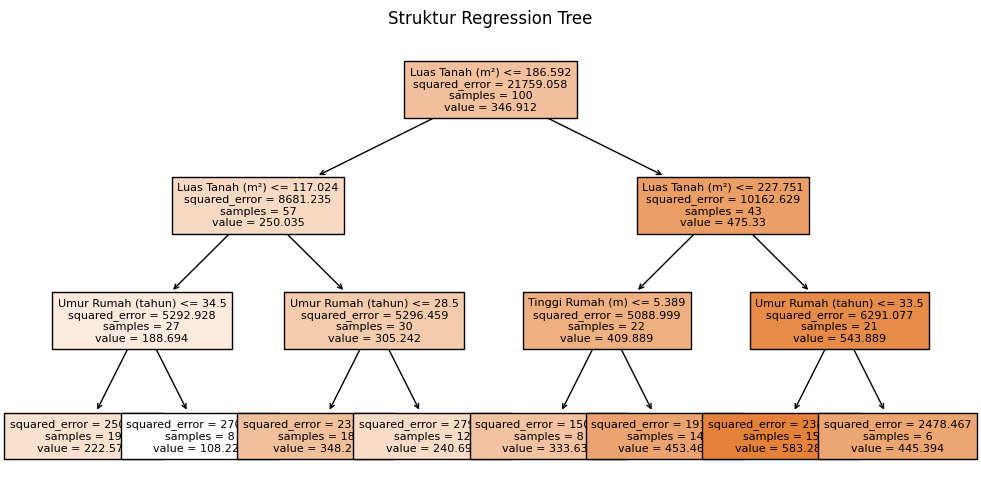

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, 
          feature_names=['Umur Rumah (tahun)', 'Luas Tanah (m²)', 'Banyak Kamar', 'Tinggi Rumah (m)'], 
          filled=True, fontsize=8
        )
plt.title("Struktur Regression Tree")
plt.show()

### Keunggulan 
- Interpretasi mudah (jelas jalur pengambilan keputusan)
- Dapat menangani relasi non-linier
- Tidak perlu scaling data

### Kelemahan 
- Rentan **overfitting**, terutama jika tidak dibatasi kedalamannya
- Hasil model bisa sangat berbeda dengan sedikit perubahan data (tidak stabil)
- Tidak menghasilkan prediksi halus (piecewise constant)


C. Neural Network

### D. Neural Network (NN)

Neural Network adalah algoritma yang terinspirasi dari cara kerja otak manusia, dengan menggunakan **unit-unit pemroses sederhana yang saling terhubung** (neuron buatan) untuk memodelkan hubungan kompleks antara input dan output.

Mengutip dari buku *Deep Learning* oleh Ian Goodfellow:

> *“Deep learning allows computational models that are composed of multiple processing layers to learn representations of data with multiple levels of abstraction.”*

Dengan kata lain, Neural Network (NN) sangat kuat dalam **mengenali pola** bahkan dari data yang kompleks, dan bisa digunakan untuk tugas **klasifikasi maupun regresi**.

<img src="./assets/neural-network.png" alt="linear regression" width="fit-content" height="fit-content">

NN terdiri dari beberapa lapisan:
1. **Input Layer**: Menerima data input (fitur).
2. **Hidden Layer(s)**: Proses data menggunakan bobot dan fungsi aktivasi.
3. **Output Layer**: Menghasilkan output akhir (klasifikasi atau prediksi numerik).

Setiap node/neuron melakukan operasi berikut:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

Kemudian melewati **fungsi aktivasi**:

$$
a = f(z)
$$

Beberapa fungsi aktivasi umum:
- **Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- **ReLU**: $f(z) = \max(0, z)$
- **Tanh**: $f(z) = \tanh(z)$

Selama melalui neuron-neuron tersebut terjadi beberapa proses yang terjadi:

1. **Forward Pass**: Input diproses lapis demi lapis hingga menghasilkan output.
2. **Loss Calculation**: Hitung selisih antara output prediksi dan target sebenarnya, misalnya dengan MSE atau cross-entropy.
3. **Backward Pass (Backpropagation)**: Gradien dari loss dihitung untuk memperbarui bobot.
4. **Optimisasi**: Bobot diperbarui menggunakan algoritma seperti Gradient Descent atau Adam.


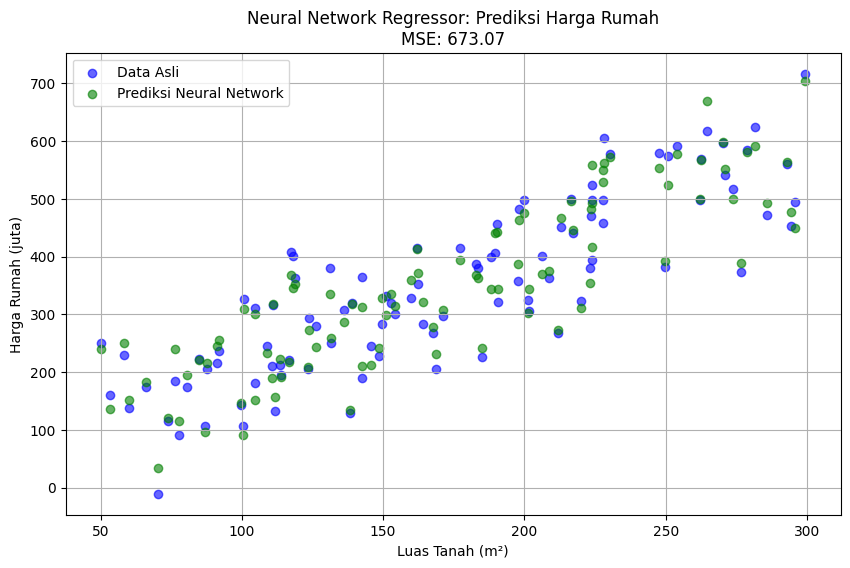

Contoh Data dan Prediksi Neural Network (5 baris pertama):
   Umur Rumah  Luas Tanah  Banyak Kamar  Tinggi Rumah  Harga Asli (juta)  \
0          39  148.720380             4      5.218454         228.551574   
1          29  123.372044             3      4.186449         205.435478   
2          15   53.519956             2      6.897609         160.430881   
3          43   99.710601             3      9.553083         143.734881   
4           8  227.835488             3      7.872209         497.471753   

   Harga Prediksi (juta)  
0             242.143033  
1             208.881015  
2             136.096459  
3             145.608095  
4             549.420441  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
n_samples = 100

umur_rumah = np.random.randint(1, 50, n_samples)
luas_tanah = np.random.uniform(50, 300, n_samples)
banyak_kamar = np.random.randint(1, 6, n_samples)
tinggi_rumah = np.random.uniform(3, 10, n_samples)

harga_rumah = (2 * luas_tanah + 20 * banyak_kamar - 5 * umur_rumah + 10 * tinggi_rumah +
               np.random.normal(0, 30, n_samples))

data = pd.DataFrame({
    'Umur Rumah (tahun)': umur_rumah,
    'Luas Tanah (m²)': luas_tanah,
    'Banyak Kamar': banyak_kamar,
    'Tinggi Rumah (m)': tinggi_rumah,
    'Harga Rumah (juta)': harga_rumah
})

X = data[['Umur Rumah (tahun)', 'Luas Tanah (m²)', 'Banyak Kamar', 'Tinggi Rumah (m)']]
y = data['Harga Rumah (juta)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

nn_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs', max_iter=5000, random_state=42)
nn_model.fit(X_scaled, y)


y_pred_nn = nn_model.predict(X_scaled)

mse_nn = mean_squared_error(y, y_pred_nn)


plt.figure(figsize=(10, 6))
plt.scatter(data['Luas Tanah (m²)'], y, color='blue', label='Data Asli', alpha=0.6)
plt.scatter(data['Luas Tanah (m²)'], y_pred_nn, color='green', label='Prediksi Neural Network', alpha=0.6)
plt.title(f'Neural Network Regressor: Prediksi Harga Rumah\nMSE: {mse_nn:.2f}')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Rumah (juta)')
plt.grid(True)
plt.legend()
plt.show()


print("Contoh Data dan Prediksi Neural Network (5 baris pertama):")
comparison_nn = pd.DataFrame({
    'Umur Rumah': data['Umur Rumah (tahun)'][:5],
    'Luas Tanah': data['Luas Tanah (m²)'][:5],
    'Banyak Kamar': data['Banyak Kamar'][:5],
    'Tinggi Rumah': data['Tinggi Rumah (m)'][:5],
    'Harga Asli (juta)': y[:5],
    'Harga Prediksi (juta)': y_pred_nn[:5]
})
print(comparison_nn)

Keunggulan
- Mampu memodelkan hubungan non-linear yang sangat kompleks
- Fleksibel untuk berbagai jenis data (teks, gambar, suara)
- Bisa dikembangkan menjadi model deep learning (CNN, RNN, dll.)

Kelemahan 
- Membutuhkan waktu pelatihan yang lebih lama dan data yang cukup besar
- Lebih sulit untuk diinterpretasikan dibanding model seperti decision tree
- Tergantung pada banyak hyperparameter (jumlah layer, neuron, learning rate, dll.)


## Gradient Descent

Gradient Descent adalah teknik optimisasi yang digunakan untuk menemukan parameter terbaik dalam model supervised learning, khususnya pada **regresi** dan **neural network**. Teknik ini bekerja dengan cara **menuruni lereng fungsi loss (fungsi error)** untuk mencapai nilai minimum.

Mengutip dari buku *Deep Learning* oleh Ian Goodfellow et al.:

> *"The most common optimization algorithm in machine learning is stochastic gradient descent (SGD), which performs well even with large datasets by using approximations."*

Untuk memahami mekanisme Gradient Descent, kita dapat melihat salah satu fungsi error yang sering digunakan dalam regresi, yaitu **Sum of Squared Residuals (SSR)**:

$$
J(\theta) = \sum_{i=1}^{m} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right)^2
$$

Keterangan:
- **Nilai Target**: $y^{(i)}$ = Nilai sebenarnya pada data ke-$i$
- **Prediksi Model**: $h(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$
- **Jumlah Data**: $m$ = Total jumlah data

Fungsi ini menghitung **jumlah kuadrat selisih** antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai $\theta$, semakin baik model melakukan prediksi terhadap data.

Untuk menemukan nilai parameter $\theta_0 $ dan $\theta_1 $ terbaik, Gradient Descent menggunakan rumus pembaruan berikut:

$$
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$$

Keterangan:
- **Learning Rate**: $\alpha$ = Ukuran langkah pada setiap iterasi
- **Gradien**: $\frac{\partial J(\theta)}{\partial \theta_j}$ = Turunan fungsi error terhadap parameter $\theta_j$
- **Indeks Parameter**: $j$ = Nilai 0 atau 1, mewakili parameter regresi linear

### Visualisasi Gradient Descent

Bayangkan fungsi error sebagai permukaan 3D. Gradient Descent akan mencari jalan tercepat ke bawah dengan mengikuti arah paling curam berdasarkan gradien.


<img src="./assets/gradient descent.png" alt="Gradient Descent Illustration" width="400px" height="400px">


In [15]:
import numpy as np
import plotly.graph_objects as go

np.random.seed(1)
x = np.linspace(0, 10, 50)
y = 3 * x + 5 + np.random.randn(*x.shape) * 2
m = len(x)

def compute_ssr(theta0, theta1):
    theta0 = theta0.reshape(-1, 1)
    theta1 = theta1.reshape(-1, 1)
    y_pred = theta0 + theta1 * x
    return np.sum((y_pred - y) ** 2, axis=1)

theta0_vals = np.linspace(0, 10, 100)
theta1_vals = np.linspace(0, 6, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
Z = compute_ssr(T0.ravel(), T1.ravel()).reshape(T0.shape)

def gradient_descent_ssr(x, y, alpha=0.0005, iterations=100):
    theta0 = 0
    theta1 = 0
    path = []

    for i in range(iterations):
        y_pred = theta0 + theta1 * x
        d_theta0 = -2 * np.sum(y - y_pred)
        d_theta1 = -2 * np.sum((y - y_pred) * x)
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
        cost = compute_ssr(np.array([theta0]), np.array([theta1]))[0]
        path.append((theta0, theta1, cost))
    
    return path

path = gradient_descent_ssr(x, y, alpha=0.0005, iterations=100)
theta0_path, theta1_path, cost_path = zip(*path)

fig = go.Figure()

# Permukaan SSR
fig.add_trace(go.Surface(
    z=Z, x=T0, y=T1,
    colorscale='Viridis',
    opacity=0.7,
    name='Permukaan SSR',
    showscale=False
))

# Jalur Gradient Descent
fig.add_trace(go.Scatter3d(
    x=theta0_path, y=theta1_path, z=cost_path,
    mode='lines+markers',
    marker=dict(size=3, color='red'),
    line=dict(color='red', width=3),
    name='Jalur Gradient Descent'
))

# Titik Awal
fig.add_trace(go.Scatter3d(
    x=[theta0_path[0]], y=[theta1_path[0]], z=[cost_path[0]],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Titik Awal'
))

# Titik Akhir
fig.add_trace(go.Scatter3d(
    x=[theta0_path[-1]], y=[theta1_path[-1]], z=[cost_path[-1]],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Titik Akhir'
))

fig.update_layout(
    title='Gradient Descent pada Sum of Squared Residual (SSR)',
    scene=dict(
        xaxis_title='θ₀ (Intercept)',
        yaxis_title='θ₁ (Slope)',
        zaxis_title='SSR Loss'
    ),
    width=900,
    height=700,
    legend=dict(
        x=0.75,
        y=0.95,
        bgcolor='rgba(255,255,255,0.6)',
        bordercolor='black',
        borderwidth=1,
        font=dict(size=12)
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


**Keunggulan:**
- Sederhana dan fleksibel, dapat digunakan di berbagai algoritma.
- Dapat digunakan pada data besar (dengan SGD/mini-batch).

**Kelemahan:**
- Sensitif terhadap learning rate.
- Lambat jika tidak disesuaikan dengan baik.

### Bias dan Variance
Dalam supervised learning, kesalahan prediksi total dari suatu model dapat dibagi menjadi tiga komponen utama:

> **Total Error = Bias² + Variance + Irreducible Error**

**Bias**

Bias menggambarkan **seberapa jauh prediksi model dari nilai sebenarnya**.

- **Bias tinggi** berarti model membuat asumsi yang terlalu sederhana, sehingga gagal menangkap pola data dengan baik (*underfitting*).
- Bias umumnya terjadi ketika model terlalu sederhana untuk kompleksitas data.

**Contoh model dengan bias tinggi:**
- Regresi linear pada data yang bentuknya non-linear.
- Neural network dengan terlalu sedikit neuron atau layer.

 **Variance**

Variance menggambarkan **seberapa sensitif model terhadap perubahan data pelatihan**.

- **Variance tinggi** berarti model terlalu menyesuaikan diri dengan data pelatihan, bahkan terhadap noise (*overfitting*).
- Model dengan variance tinggi akan tampil sangat baik pada data pelatihan, tetapi buruk pada data uji.

**Contoh model dengan variance tinggi:**
- Decision tree dengan kedalaman tak terbatas.
- Neural network besar tanpa regularisasi.

**Irreducible Error**

Ini adalah kesalahan yang **tidak bisa dihindari** karena berasal dari:
- Noise alami dalam data,
- Variabel yang tidak terukur atau tidak tersedia.


Performa model bisa dianalogikan seperti ini:

<img src="./assets/variance dan bias.png" alt="linear regression" width="400px" height="400px">  

### Trade-off Bias-Variance

<img src="./assets/bias-variance.png" alt="linear regression" width="600px" height="400px">   

Tujuan utama dalam membangun model adalah mencapai **bias dan variance yang seimbang**, yaitu:

- Tidak terlalu sederhana (bias rendah),
- Tidak terlalu kompleks (variance rendah),
- Sehingga model dapat **menggeneralisasi dengan baik** ke data yang belum pernah dilihat.